<a href="https://colab.research.google.com/github/sedrisella/Pemrograman-python/blob/main/Task_8_modul_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.applications.vgg16 import VGG16
model=VGG16()
model.summary()

553467096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

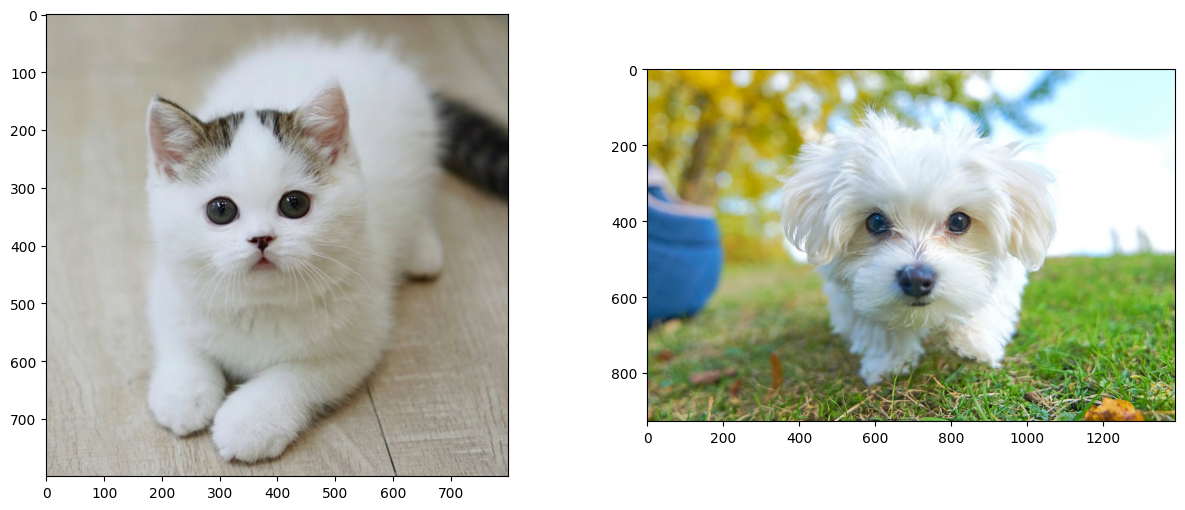

(2, 224, 224, 3)


In [5]:
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

urls=[]
urls.append("https://cdn-cas.orami.co.id/parenting/images/kucing_gemas-1.width-800.jpg")
urls.append("https://community.velvetmag.it/wp-content/uploads/2021/07/Maltese-1392x928.jpeg")

imgs=[]
plt.figure(figsize=(15,6))
for u in range(0,len(urls)):
    r=requests.get(urls[u],stream=True)
    img=np.array(Image.open(r.raw))
    plt.subplot(1,len(urls),u+1)
    plt.imshow(img)
    img=cv2.resize(img,(224,224))
    imgs.append(img)
plt.show()
imgs=np.array(imgs)
print(imgs.shape)


In [6]:
yh=model.predict(imgs)
for i in range(len(urls)):
  if(np.argmax(yh[i])>150 and np.argmax(yh[i])<269):
    print ("Anjing")
  else:
    print("Kucing")

1/1 [==============================] - 2s 2s/step
Kucing
Anjing


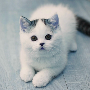

True

In [11]:
import requests
import numpy as np
import cv2
from PIL import Image
from io import BytesIO
from google.colab.patches import cv2_imshow

# definisikan URL gambar yang ingin diambil
url = 'https://cdn-cas.orami.co.id/parenting/images/kucing_gemas-1.width-800.jpg'

# unduh gambar dari URL
response = requests.get(url)
img = np.array(Image.open(BytesIO(response.content)))

# meresize gambar ke ukuran 90x90 piksel
resized_img = cv2.resize(img, (90, 90))

# menampilkan gambar yang telah di-resize
cv2_imshow(resized_img)

# menyimpan gambar yang telah di-resize
cv2.imwrite('nama_gambar_resize.jpg', resized_img)




In [15]:
import os

# membuat direktori baru bernama "training_data"
if not os.path.exists("training_data"):
    os.mkdir("training_data")

# membuat direktori baru bernama "Kucing" di dalam "training_data"
if not os.path.exists("training_data/Kucing"):
    os.mkdir("training_data/Kucing")

# membuat direktori baru bernama "Anjing" di dalam "training_data"
if not os.path.exists("training_data/Anjing"):
    os.mkdir("training_data/Anjing")


In [20]:
import requests
import numpy as np
import cv2
import os

# definisikan URL gambar yang ingin diambil
urls=[]
urls.append("https://cdn-cas.orami.co.id/parenting/images/kucing_gemas-1.width-800.jpg")
urls.append("https://community.velvetmag.it/wp-content/uploads/2021/07/Maltese-1392x928.jpeg")

# loop untuk mengunduh dan menyimpan gambar ke dalam folder training_data/Kucing
for u in range(0,len(urls)):
    r=requests.get(urls[u],stream=True)
    img=np.array(Image.open(r.raw))
    img=cv2.resize(img,(224,224))
    cv2.imwrite(f"training_data/Kucing/{u}.jpg", img)
    cv2.imwrite(f"training_data/Anjing/{u}.jpg", img)

# loop untuk membaca gambar-gambar kucing dari folder training_data/Kucing
path = "training_data"
categories = ["Kucing","Anjing"]
training_data = []

for category in categories:
    class_num = categories.index(category)
    for img_file in os.listdir(os.path.join(path, category)):
        img_path = os.path.join(path, category, img_file)
        img = cv2.imread(img_path)
        training_data.append([img, class_num])

# shuffle data training
np.random.shuffle(training_data)

# split data training dan data validasi
train_size = int(len(training_data)*0.8)
train_data = training_data[:train_size]
val_data = training_data[train_size:]

# konversi data training dan validasi ke dalam array numpy
X_train = []
y_train = []
X_val = []
y_val = []

for features, label in train_data:
    X_train.append(features)
    y_train.append(label)

for features, label in val_data:
    X_val.append(features)
    y_val.append(label)

X_train = np.array(X_train).reshape(-1, 224, 224, 3)
y_train = np.array(y_train)

X_val = np.array(X_val).reshape(-1, 224, 224, 3)
y_val = np.array(y_val)

# normalisasi nilai pixel gambar ke dalam rentang [0,1]
X_train = X_train/255.0
X_val = X_val/255.0

# cek ukuran data training dan validasi
print("Ukuran data training:", X_train.shape)
print("Ukuran label training:", y_train.shape)
print("Ukuran data validasi:", X_val.shape)
print("Ukuran label validasi:", y_val.shape)



Ukuran data training: (3, 224, 224, 3)
Ukuran label training: (3,)
Ukuran data validasi: (1, 224, 224, 3)
Ukuran label validasi: (1,)


In [21]:
import os

path = 'training_data'
categories = os.listdir(path)

for category in categories:
    print(f"Jumlah data training {category}: {len(os.listdir(os.path.join(path, category)))}")


Jumlah data training Kucing: 2
Jumlah data training Anjing: 2


In [25]:
UKURAN_GAMBAR = 224 # ukuran gambar yang ingin digunakan


In [26]:
X=[]
Y=[]
for features,label in training_data:
  X.append(features)
  Y.append(label)

X=np.array(X).reshape(-1,UKURAN_GAMBAR,UKURAN_GAMBAR,1)


In [27]:
import pickle

In [29]:
pickleOut= open("X.pickle","wb")
pickle.dump(X,pickleOut)
pickleOut.close()

pickleOut= open("X.pickle","wb")
pickle.dump(Y,pickleOut)
pickleOut.close()

In [30]:
pickleIn= open("X.pickle","rb")
X=pickle.load(pickleIn)

In [31]:
X[1]

1

In [35]:
!pip install keras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(50, 50, 1)))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

import numpy as np

X = np.array(X)
Y = np.array(Y)


# tambahkan lapisan lainnya...

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])





In [51]:
model.add(Flatten())

In [52]:
model.add(Dense(64))

In [53]:
model.add(Dense(1))

In [54]:
model.add(Activation("sigmoid"))

In [57]:
model.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])


In [64]:
histori=model.fit(
          train_generator,
          steps_per_epoch=6,
          epochs=25,
          validation_data=var_generator,
          validation_steps=1,
          verbose=1,
          callbacks=[callbacks]
)